In [49]:
import numpy as np
import astropy.units as u
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt

from deproject import deproject, get_galaxy_specs

In [73]:
### my functions ###

def downsample(arr, n): # takes an array as an argument and returns list containing only every nth element
    result = []
    for i in range(0, len(arr) + 1 - n, n): # not taking into account last few data points that don't fit in a set of size n
        sum = 0
        for j in range(n):
            sum += arr[i+j] # for each increment of n data points, we're going through and summing each one
        result.append(sum / n) # we're appending the average of the last n data points to result
    return result
### NOTE: If the array passed to downsample() isn't flattened, it will downsample vertically (across rows) down array instead of horizontally (down rows)

def median(arr):
    arr.sort()
    length = len(arr)
    if length % 2 == 0:
        return ( arr[length // 2 - 1] + arr[length // 2] ) / 2
    else:
        return arr[length // 2]

def downsample_med(arr, n): # array must be flattened (my code to calc median doesn't work if it isnt')
    result = []
    for i in range(0, len(arr) + 1 - n, n):
        values = []
        for j in range(n):
            values.append(arr[i+j])
        result.append(median(values))
    return result


### ↓↓↓ this is a version of downsample with the ability to choose between using mean and median
# def downsample(arr, n, med=False): # med is an optional parameter, if no value is assigned when calling the function, it assumes indicated value of False
#     if med == True: # array should be flattened if this is the case
#         result = []
#         for i in range(0, len(arr) + 1 - n, n):
#             values = []
#             for j in range(n):
#                 values.append(arr[i+j])
#             result.append(median(values))
#     else:
#         result = []
#         for i in range(0, len(arr) + 1 - n, n):
#             sum = 0
#             for j in range(n):
#                 sum += arr[i+j] 
#             result.append(sum / n)
#     return result

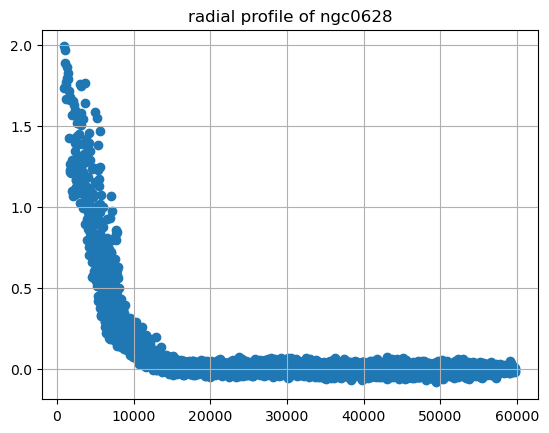

In [51]:
galaxy = 'NGC0628'
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy) # DIST [Mpc]
hdu_galx = fits.open('/Users/michaelhill/Downloads/raw_background_comps/'+galaxy.lower()+'_w3_mjysr.fits')[0]

# wcs_galx = WCS(hdu_galx.header)
# wcs_galx.sip = None

deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc = r_deg * (np.pi / 180) * (DIST * 1e6) # in pc


ax = plt.scatter(downsample_med(r_pc.flatten(), 30), downsample_med(hdu_galx.data.flatten(), 30))
# plt.yscale('log') # this demonstrates relationship between intensity and radius; remove to see default plot
# plt.xlim(0, 5000) # once we get to values of r for which there are negative intensity, log(y) becomes messy and fails to demonstrate relationship between r and intensity
ax = plt.grid()
ax = plt.title('radial profile of ' + galaxy.lower())
plt.show()

### ↓↓↓ ignore, I was just fitting an exponential decay curve
# import math
# x = np.linspace(0, 60000)
# y = 4*math.e**(-0.000277*x) # method for finding equation: guestimate y-intercept (4 may be a little too big), note that (~10000, ~.25) on line, solve for c from y=2.5*e^(cx)
# plt.plot(x, y, color='orange')
# plt.ylim(-.2, 2.5)


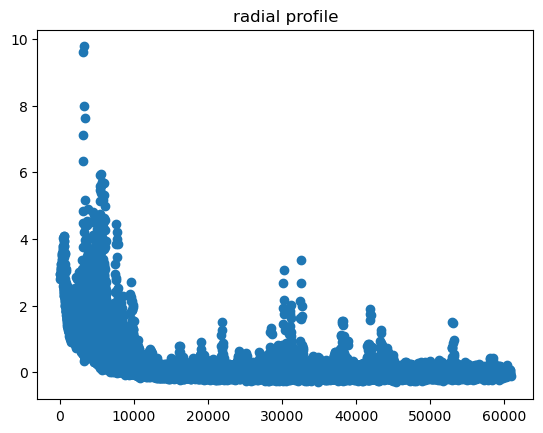

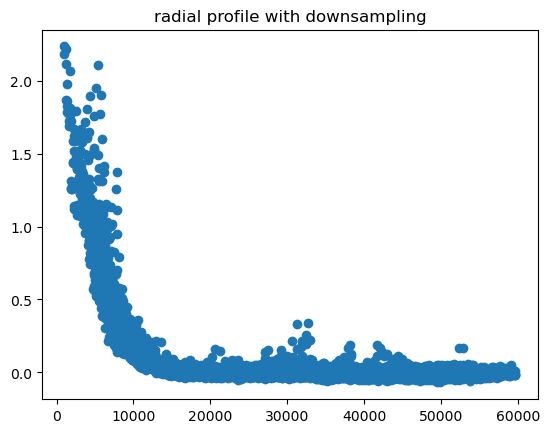

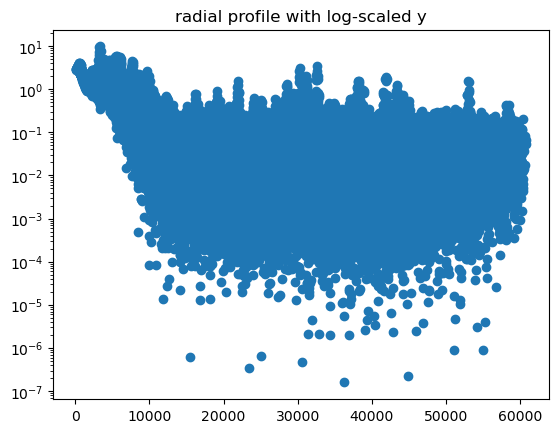

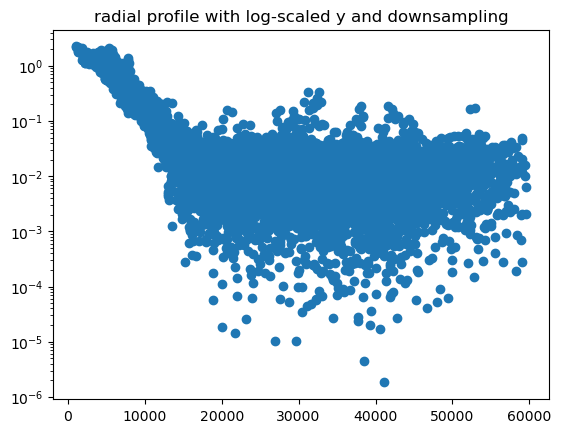

In [56]:
# radial profile
ax1 = plt.scatter(downsample(r_pc.flatten(), 1), downsample(hdu_galx.data.flatten(), 1))
ax1 = plt.title('radial profile')

# radial profile with downsampling
ax2 = plt.figure()
ax2 = plt.scatter(downsample(r_pc.flatten(), 30), downsample(hdu_galx.data.flatten(), 30))
ax2 = plt.title('radial profile with downsampling')

# radial profile with log-scaled y
ax3 = plt.figure()
ax3 = plt.scatter(downsample(r_pc.flatten(), 1), downsample(hdu_galx.data.flatten(), 1))
ax3 = plt.yscale('log') # this demonstrates relationship between intensity and radius; remove to see default plot
ax3 = plt.title('radial profile with log-scaled y')

### NOTE: these log-scales automatically ignore negative data points; should downsample prior to log-scaling

#radial profile with log-scaled y and downsampling
ax4 = plt.figure()
ax4 = plt.scatter(downsample(r_pc.flatten(), 30), downsample(hdu_galx.data.flatten(), 30))
ax4 = plt.yscale('log') # this demonstrates relationship between intensity and radius; remove to see default plot
ax4 = plt.title('radial profile with log-scaled y and downsampling')

### trying to use subplots messed up formatting of profiles

<Figure size 640x480 with 0 Axes>

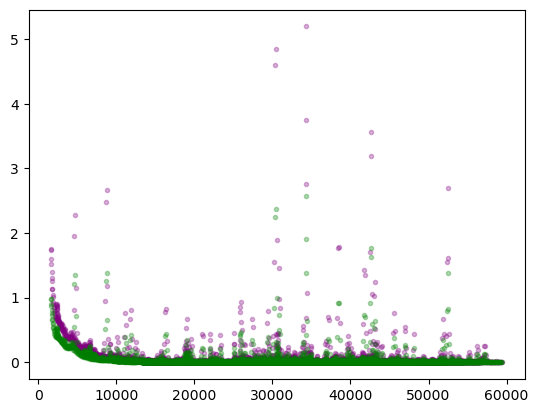

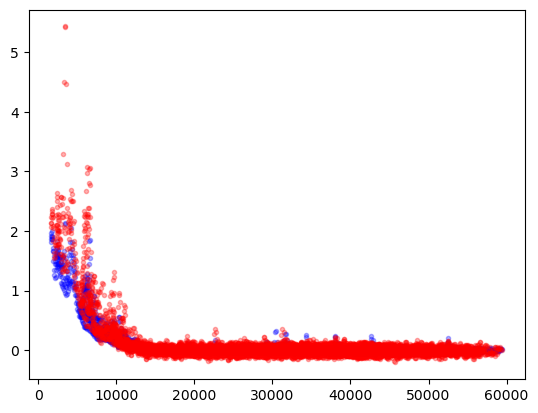

<Figure size 640x480 with 0 Axes>

In [53]:
### plot wise vs one another ###

# go through and open each wise, then plot

###
galaxy = 'NGC0628'
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy) # DIST [Mpc]
hdu_galx_w3 = fits.open('/Users/michaelhill/Downloads/raw_background_comps/'+galaxy.lower()+'_w3_mjysr.fits')[0]

# wcs_galx = WCS(hdu_galx.header)
# wcs_galx.sip = None

deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc_w3 = r_deg * (np.pi / 180) * (DIST * 1e6) # in pc
###
galaxy = 'NGC0628'
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy) # DIST [Mpc]
hdu_galx_w4 = fits.open('/Users/michaelhill/Downloads/raw_background_comps/'+galaxy.lower()+'_w4_mjysr.fits')[0]

# wcs_galx = WCS(hdu_galx.header)
# wcs_galx.sip = None

deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc_w4 = r_deg * (np.pi / 180) * (DIST * 1e6) # in pc
###
galaxy = 'NGC0628'
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy) # DIST [Mpc]
hdu_galx_w1 = fits.open('/Users/michaelhill/Downloads/raw_background_comps/'+galaxy.lower()+'_w1_mjysr.fits')[0]

# wcs_galx = WCS(hdu_galx.header)
# wcs_galx.sip = None

deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc_w1 = r_deg * (np.pi / 180) * (DIST * 1e6) # in pc
###
galaxy = 'NGC0628'
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy) # DIST [Mpc]
hdu_galx_w2 = fits.open('/Users/michaelhill/Downloads/raw_background_comps/'+galaxy.lower()+'_w2_mjysr.fits')[0]

# wcs_galx = WCS(hdu_galx.header)
# wcs_galx.sip = None

deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc_w2 = r_deg * (np.pi / 180) * (DIST * 1e6) # in pc
###
plt.scatter(downsample(r_pc_w1, 30), downsample(hdu_galx_w1.data, 30), marker='.', alpha=.3, label = 'w1', color='purple')
plt.scatter(downsample(r_pc_w2, 30), downsample(hdu_galx_w2.data, 30), marker='.', alpha=.3, label = 'w2', color='green')
plt.figure()
plt.scatter(downsample(r_pc_w3, 30), downsample(hdu_galx_w3.data, 30), marker='.', alpha=.3, label = 'w3', color='blue')
plt.scatter(downsample(r_pc_w4, 30), downsample(hdu_galx_w4.data, 30), marker='.', alpha=.3, label = 'w4', color='red')
plt.figure()